In [1]:
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import convexgating as cg
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import os
print(sys.executable)

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local_parameter_option\python.exe


In [2]:
pre = 'COV03_summary_scores_recall_mode'
start_time = hr.get_time()

In [3]:
path_input_data = hr.return_input_data_path() 
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))

## Summarize best scores

In [4]:
path_gating_directory = os.path.join(path_output_data,'COV02_run_gating_recall_mode') 

In [5]:
clusters = ['C7','C8','C25','C26']

In [6]:
cluster_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for cluster in clusters:
    perf_loc = os.path.join(path_gating_directory, cluster,'cluster_' + cluster,'performance.csv')
    f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
    cluster_list.append(cluster)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    hierarchy_list.append(hierarchy)

In [7]:
df_summary =pd.DataFrame({'f1':f1_list,'recall':recall_list,'precision':precision_list, 'cluster' : cluster_list})
df_summary.to_csv(os.path.join(path_output_script,pre + '_df.csv'))

In [8]:
df_summary

,f1,recall,precision,cluster
0,0.730782,0.702720,0.761179,C7
1,0.565825,0.504591,0.643973,C8
2,0.712647,0.864640,0.606101,C25
3,0.739291,0.783632,0.699700,C26


## Plot

<Figure size 640x480 with 0 Axes>

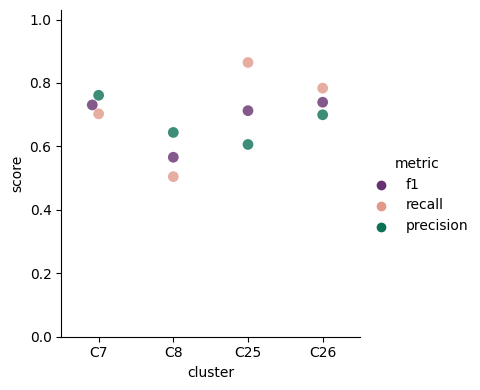

In [9]:
df_summary_melted = pd.melt(df_summary[['f1','recall','precision','cluster']], id_vars="cluster", var_name="metric", value_name="score")

palette={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}
order=['C7','C8','C25','C26']

plt.figure()
sb.catplot(x='cluster', y="score", hue="metric", data=df_summary_melted,s=60, kind='swarm',palette=palette,order = order,height = 4,alpha = 0.8)
plt.ylim([0,1.03])
plt.savefig(os.path.join(path_output_script,pre + '_catplot_metrics.pdf'),bbox_inches='tight')
plt.show()
plt.close()

## Save session

In [10]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=5, microseconds=783460)